# GA v Hillclimber sheet

Investigating the performance of a GA against a population of hillclimbers

Imports we will need

In [ ]:
#useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

My report looks at solving the knapsac problem








# Defining the Knapsack problem
This report looks at solving the knapsac problem

Given a set of items, each with volume and benefit score, determine the number of each item to include in a collection(knapsack), so that the total volume is less than or equal to the given limit and the total benefit is maximized as much as possible.

In [ ]:
max_volume = 100
num_items = 50

np.random.seed(0)
benefits = np.random.randint(0, 10, num_items)
volumes = np.random.randint(0, 10, num_items)
print(f'Benefits: {benefits}')
print(f'Volume: {volumes}')

Benefits: [5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3
 7 0 1 9 9 0 4 7 3 2 7 2 0]
Volume: [0 4 5 5 6 8 4 1 4 9 8 1 1 7 9 9 3 6 7 2 0 3 5 9 4 4 6 4 4 3 4 4 8 4 3 7 5
 5 0 1 5 9 3 0 5 0 1 2 4 2]


In [ ]:
num_individuals = 20
num_genes = num_items

In [ ]:
def generate_population(n_individuals, n_genes, all_zeros=False):
    '''
    Generates a population of genes
    :param n_individuals: number of individuals in a population
    :param n_genes: number of genes each individual has
    :param all_zeros: if true population will contain zero values only
    '''
    if all_zeros:
      P = np.random.choice([0], (n_individuals, n_genes))
    else:
      P = np.random.choice([0,1], (n_individuals, n_genes))
    return P 

In [ ]:
# Fitness function
def fitness_function(genotype, benefits=benefits, volumes=volumes, max_volume=max_volume):
    '''
    Calculates the fitness of a given genotype.    
    if the volume exceeds the knapsack's maximum volume , the fitness returned is 0
    :param genotype: a binary genotype
    :param benefits: a given set of item benefits
    :param volumes: a given set of item volumes
    :param max_volume: maximum knapsack volume
    :returns: fitness of a genotype
    '''
    phenotype = [(benefits[i],volumes[i]) for i in range(len(genotype)) if genotype[i]==1]
    total_benefit = sum([b for b,v in phenotype])
    total_volume = sum([v for b,v in phenotype])

    if total_volume < max_volume: 
      fitness = total_benefit 
    else: 
      fitness = 0

    return fitness # a single number which quantifies how close to the ideal solution a phenotype is

In [ ]:
print(f'Benefits: {benefits}')
print(f'Volumes: {volumes}')

P = generate_population(num_individuals, num_genes)
g = P[0]

print(f'Population: {P}')
print(f'Genotype: {g}')
print(fitness_function(g))

Benefits: [5 0 3 3 7 9 3 5 2 4 7 6 8 8 1 6 7 7 8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3
 7 0 1 9 9 0 4 7 3 2 7 2 0]
Volumes: [0 4 5 5 6 8 4 1 4 9 8 1 1 7 9 9 3 6 7 2 0 3 5 9 4 4 6 4 4 3 4 4 8 4 3 7 5
 5 0 1 5 9 3 0 5 0 1 2 4 2]
Population: [[0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1
  1 1 0 0 0 1 1 1 0 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0
  1 1 0 0 0 1 0 1 0 1 1 0 1 0]
 [1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0
  0 0 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0
  0 0 0 0 1 0 0 0 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0
  1 0 0 1 1 0 1 0 1 0 1 0 1 0]
 [0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
  1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
  1 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 1 0 1 0 

 # Definition of hillclimbing algorithm
 

In [ ]:
def hcmutate(genotype, rate=0.3):
    '''
    mutate genotype with a given mutation rate
    :param genotype: a single binary genotype
    :param rate: mutation rate
    :return: mutated genotype if new fitness is better, original genotype otherwise
    '''
    mutated = np.copy(genotype)
  
    for g in range(len(genotype)):
        i = np.random.random_sample(1) # generate a random number between 0 and 1
        if i <= rate: # mutate with a certain mutation rate
            mutated[g] = 0 if mutated[g] == 1 else 1
    # evaluate fitness
    if fitness_function(mutated) > fitness_function(genotype):
        return mutated
    else:
        return genotype


In [ ]:
def hillclimbers(p, generations=100, draw_plot=False):
    '''
    run a population of hillclimbers and plot their fitnesses  
    :param p: given population
    :param generations: number of generations
    :param draw_plot: drawing a plot
    :return: fitnesses for the best genotype
    '''
    fitnesses = np.empty((p.shape[0],generations), dtype=np.int64)

    for j in range(generations):
        for i,g in enumerate(p):
            new_g = hcmutate(g)
            p[i] = new_g
            fitnesses[i][j] = fitness_function(new_g)

    # Plot fitnesses
    if draw_plot:
        plt.xlabel('num of generations')
        plt.ylabel('fitness')
        for i in fitnesses:
            plt.plot(i)

    # Choose the individual with the best resulting fitness
    best_ind_idx = np.argmax(fitnesses[:,-1])
    best_ind = fitnesses[best_ind_idx]
    
    return best_ind

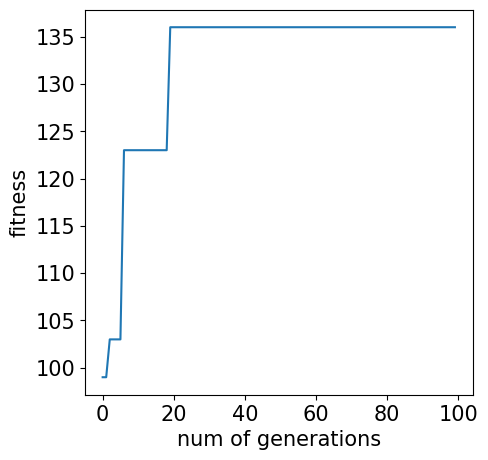

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('num of generations')
plt.ylabel('fitness')
res = hillclimbers(P,100)
plt.plot(res)
plt.show()

# Definition of Genetic Algorithm

In [ ]:
def crossover(g1, g2, rate=0.5):
  '''
  crossover two genotypes with a given crossover rate
  :param g1: first genotype
  :param g2: second genotype
  :param rate: crossover rate
  :return: the result of crossover
  '''

  for g in range(len(g1)):
    i = np.random.random_sample(1) # generate a random number between 0 and 1
    if i <= rate: # mutate with a certain mutation rate
      g2[g] = g1[g]

  return g2

In [ ]:
# Mutation function
def gamutate(genotype, rate=0.3):
    '''
    mutate genotype with a given mutation rate
    :param genotype: a single binary genotype
    :param rate: mutation rate
    :return: mutated genotype if new fitness is better, original genotype otherwise
    '''
    mutated = np.copy(genotype)
  
    for g in range(len(genotype)):
        i = np.random.random_sample(1) # generate a random number between 0 and 1
        if i <= rate: # mutate with a certain mutation rate
            mutated[g] = 0 if mutated[g] == 1 else 1
  
    # evaluate fitness
    if fitness_function(mutated) > fitness_function(genotype):
      genotype = mutated
  
    return genotype

In [ ]:
def ga(p, iterations=100, neighbourhood=3):
  '''
  perform tournament selection on a population of genotypes
  :param p: population of genotypes
  :param iterations: the number of tournaments
  :param neighbourhood: local neighbourhood
  :return: fitnesses for the best genotype
  '''
  y = np.empty(iterations)

  for j in range(iterations):
    # Evaluate fitnesses
    fitnesses = [fitness_function(g) for g in p] 
    best_fit = sorted(fitnesses, reverse=True)[0]
    # Choose the individual with the best fitness
    y[j] = best_fit

    # Get two individuals from the population in the local neighbourhood
    i1 = np.random.randint(0,len(p)-neighbourhood)
    i2 = np.random.randint(i1+1,i1+neighbourhood)

    # Compare individuals
    i1_fitness = fitness_function(p[i1])
    i2_fitness = fitness_function(p[i2])
    if i1_fitness > i2_fitness:
      winner = p[i1]
      loser  = p[i2]
      # Crossover
      c = crossover(winner, loser)
      # Mutate
      m = gamutate(c)
      p[i2] = m

    else:
      winner = p[i2]
      loser  = p[i1]
      # Crossover
      c = crossover(winner, loser)
      # Mutate
      m = gamutate(c)
      p[i1] = m

  return y


137.0


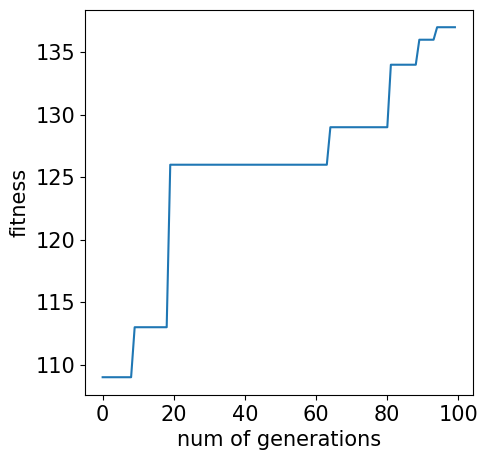

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
res = ga(P,100)
plt.plot(res)
plt.xlabel('num of generations')
plt.ylabel('fitness')
plt.show()

# Evaluation of methods

Plotting  fitnesss over time on both the Hill climber and the GA 

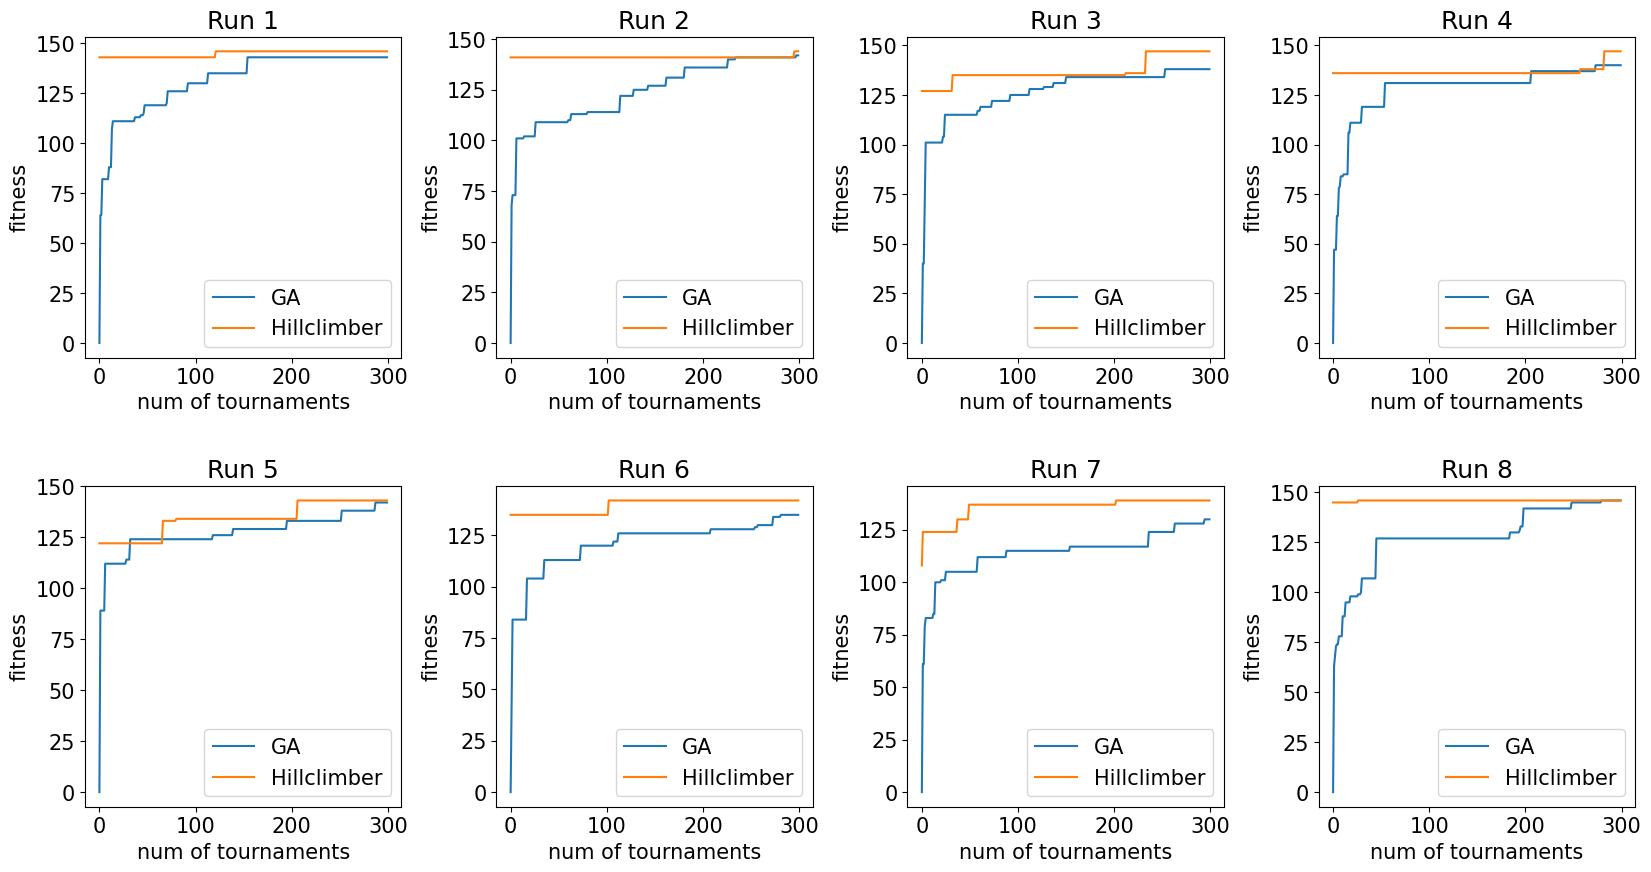

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(nrows=2, ncols=4)

for i in range(8):
    P_1 = generate_population(num_individuals, num_genes, all_zeros=True)
    
    ga_res = ga(P_1,300)
    hc_res = hillclimbers(P_1, 300)
    
    ax = axes[i//4, i%4]  # Get the subplot axes
    ax.set_title(f'Run {i+1}')
    ax.set_xlabel('num of tournaments')
    ax.set_ylabel('fitness')
    ax.plot(ga_res, label='GA')
    ax.plot(hc_res, label='Hillclimber')
    ax.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.4) # Adjust spacing between subplots

plt.show()


Comparison of box and whiskers graphs

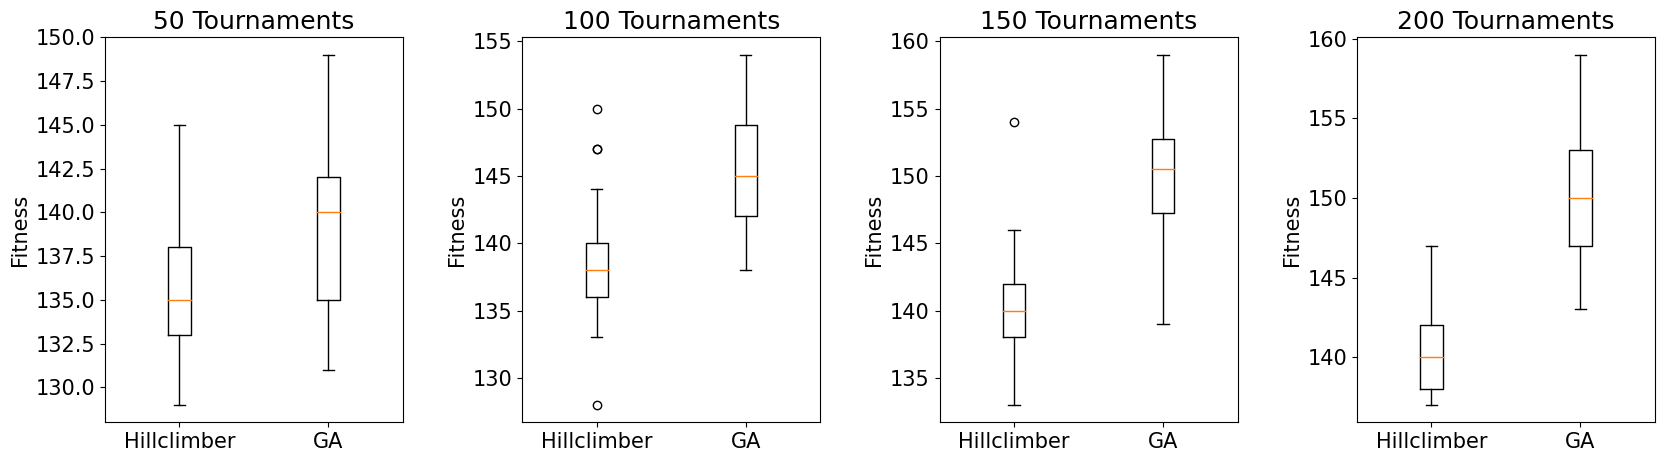

In [ ]:
# storage for results
hc_results = []
ga_results = []

for i in range(50):
    # Evaluate hillclimbers and GA's with varying numbers of tournaments
    for j in range(1, 5):
        n_tournaments = j * 50
        P_2 = generate_population(num_individuals, num_genes, all_zeros=True)
        hc_res = hillclimbers(P_2, n_tournaments)
        hc_results.append((hc_res[-1], n_tournaments))
        ga_res = ga(P_2, n_tournaments)
        ga_results.append((ga_res[-1], n_tournaments))

# create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.4, hspace=0.4)


# plot results for different numbers of tournaments
for i, n_tournaments in enumerate(range(50, 201, 50)):
    # get the results for the current number of tournaments
    hc_tournament_results = [hc_res for hc_res, n in hc_results if n == n_tournaments]
    ga_tournament_results = [ga_res for ga_res, n in ga_results if n == n_tournaments]

    # plot boxplots for hillclimbers and GA
    axs[i].boxplot((hc_tournament_results, ga_tournament_results))
    axs[i].set_title(f"{n_tournaments} Tournaments")
    axs[i].set_xticklabels(['Hillclimber', 'GA'])
    axs[i].set_ylabel('Fitness')

plt.show()

Quantitative results increasing number of iterations



In [ ]:
num_iterations = [100,200,300,400]

for j in num_iterations:
    hc_results = []
    ga_results = []
    for i in range(10):
        P_3 = generate_population(num_individuals, num_genes, all_zeros=True)
        # Evaluate hillclimbers
        hc_res = hillclimbers(P_3,j)
        hc_results.append(hc_res[-1])
        # Evaluate GA's
        ga_res = ga(P_3,j)
        ga_results.append(ga_res[-1])
    print('\n {} iterations'.format(j))
    print('Hillclimber mean  {} '.format(np.mean(hc_results))) 
    print('GA          mean  {} '.format(np.mean(ga_results))) 
    print('Hillclimber std   {}'.format(np.std(hc_results))) 
    print('GA          std   {}'.format(np.std(ga_results)))  


 100 iterations
Hillclimber mean  138.0 
GA          mean  144.5 
Hillclimber std   2.792848008753788
GA          std   4.883646178829912

 200 iterations
Hillclimber mean  141.7 
GA          mean  152.7 
Hillclimber std   2.5317977802344322
GA          std   3.7960505792204615

 300 iterations
Hillclimber mean  143.0 
GA          mean  155.4 
Hillclimber std   3.4641016151377544
GA          std   3.6660605559646724

 400 iterations
Hillclimber mean  145.3 
GA          mean  156.4 
Hillclimber std   2.368543856465402
GA          std   2.8705400188814645


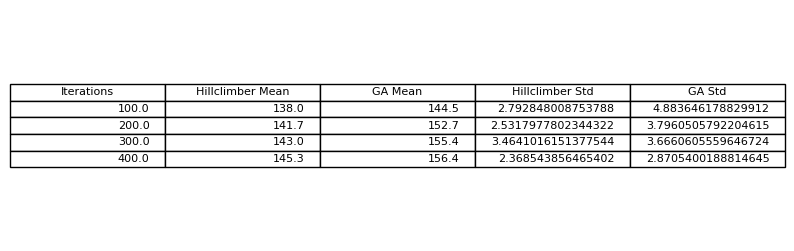

In [ ]:
data = {'Iterations': [100, 200, 300, 400],
        'Hillclimber Mean': [138.0, 141.7, 143.0, 145.3],
        'GA Mean': [144.5, 152.7, 155.4, 156.4],
        'Hillclimber Std': [2.792848008753788, 2.5317977802344322, 3.4641016151377544, 2.368543856465402],
        'GA Std': [4.883646178829912, 3.7960505792204615, 3.6660605559646724, 2.8705400188814645]}

df = pd.DataFrame(data)
styled_table = df.style.set_properties(**{'font-size': '16pt'})


fig, ax = plt.subplots(figsize=(10,3))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values,colLabels=df.columns,loc='center')

plt.show()



# Implementation and evaluation of Hybrid Genetic Algorithm

In [ ]:
def hybridga(p, iterations=100, neighbourhood=3, hillclimber_generations=10):
    '''
    perfoms tournament selection on a population of genotypes, using hillclimbing to mutate the genotypes.
    :param p: population of genotypes
    :param iterations: the number of tournaments
    :param neighbourhood: local neighbourhood
    :param hillclimber_generations: number of generations to run the hillclimber on each mutated individual
    :return: fitnesses for the best genotype
    '''
    best = np.empty(iterations)

    for j in range(iterations):
        # Evaluate fitnesses
        fitnesses = [fitness_function(g) for g in p]
        best_fit = sorted(fitnesses, reverse=True)[0]
        # select fittest individual
        best[j] = best_fit

        # get two local individuals
        i1 = np.random.randint(0,len(p)-neighbourhood)
        i2 = np.random.randint(i1+1,i1+neighbourhood)

        # compare individuals
        i1_fitness = fitness_function(p[i1])
        i2_fitness = fitness_function(p[i2])
        if i1_fitness > i2_fitness:
            winner = p[i1]
            loser  = p[i2]
        else:
            winner = p[i2]
            loser  = p[i1]

        # Crossover
        c = crossover(winner, loser)
        # Mutate using hillclimbing
        m = hcmutate(c)
        for k in range(hillclimber_generations):
            m = hcmutate(m)
        p[i2] = m

    return best


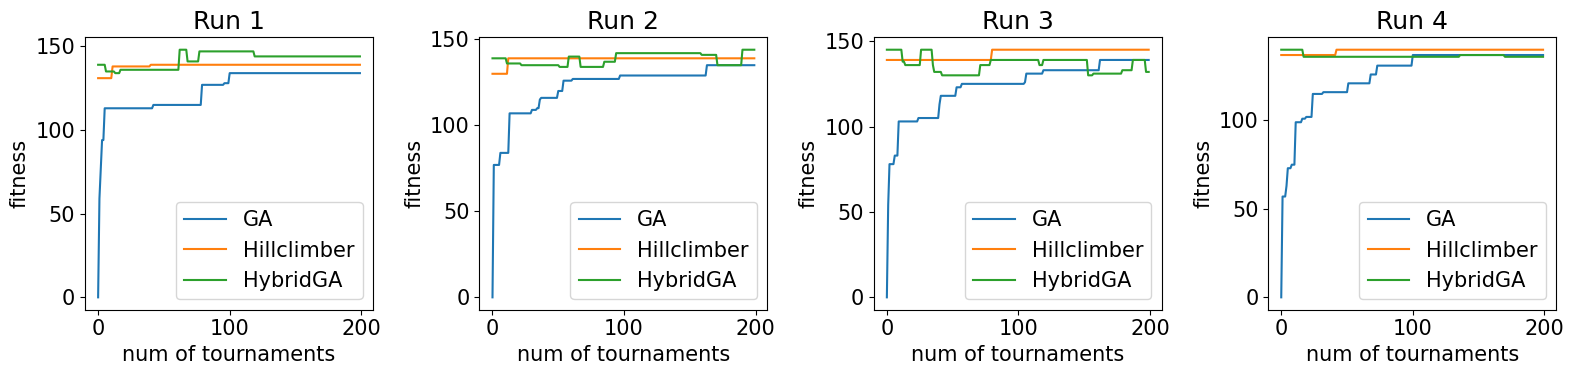

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i in range(4):
    P_4 = generate_population(num_individuals, num_genes, all_zeros=True)
    
    ga_res = ga(P_4, 200)
    hc_res = hillclimbers(P_4, 200)
    hga_res = hybridga(P_4, 200)
    
    ax = axes[i]  
    ax.set_title(f'Run {i+1}')
    ax.set_xlabel('num of tournaments')
    ax.set_ylabel('fitness')
    ax.plot(ga_res, label='GA')
    ax.plot(hc_res, label='Hillclimber')
    ax.plot(hga_res, label='HybridGA')
    ax.legend()

plt.tight_layout()
plt.show()
